In [1]:
import os, sys, re
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

# установка стиля matplotlib
%matplotlib inline
# plt.style.use('ggplot')

# доступные стили отображения графика в matplotlib
# plt.style.available

# библиотека иерархической кластеризации (для построения дендрограммы) 
# from scipy.cluster import hierarchy

# библиотека для построения выпуклой оболочки множества точек 
# from scipy import spatial

# from ydata_profiling import ProfileReport         # отключено пока не "починят"
# import sweetviz as sv
# import dtale
# import statistics as stcs
# import statsmodels.stats.proportion as stsmdls

# библиотека для расчетов метрик
# from scipy import stats
from sklearn import metrics

# библиотека для нормализации, стандартизации
# from sklearn import preprocessing

# библиотека модели линейной регрессии
from sklearn import linear_model

# библиотека модели деревьев решения
# from sklearn import tree

# библиотека модели ансамблей
# from sklearn import ensemble

# библиотека модели кластеризации
# from sklearn import cluster

# библиотека модели эллиптической кластеризации
# from sklearn import mixture

# библиотека модели метода главных компонент PCA
# from sklearn import decomposition

# библиотека модели TSNE
# from sklearn import manifold

# библиотека clustergram-кластеризации
# from clustergram import Clustergram

# библиотека для разделения датасета
from sklearn import model_selection

# библиотека для исключения признаков RFE
# from sklearn import feature_selection

# библиотека для кодирования признаков
# import category_encoders as ce

# для обработки timestamp в формате utc
import datetime, time

# работа с json
# import json
from pprint import pprint

# веб-скрэпинг сайтов
# import requests
# from bs4 import BeautifulSoup

# выводить все результаты вычислений в ячейках Code
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# подключить Latex
from IPython.display import Latex

# загрузка и обработка файлов
import wget, gdown, fast_unzip, rm
# import kaggle

# логгирование / логирование
import logging

# скрытие сообщений об ошибках при обработке ответов
import warnings
# игнорируем предупреждения
warnings.filterwarnings('ignore')

# библиотека для передачи функции обратного вызова
# from functools import partial

# библиотека поиска гиперпараметров hyperopt
# import hyperopt
# from hyperopt import hp, fmin, tpe, Trials

# библиотека поиска гиперпараметров optuna
# import optuna
# from optuna import Trial, study, samplers

# подключить сборщик "мусора"
import gc

# библиотека для обработки символьных переменных и операций
# import sympy as sp

# импортируем подкласс для поиска области значений / определения
# from sympy.calculus import util

# декомпозиция временного ряда
from statsmodels.tsa import seasonal

# тесты (тест Дики-Фуллера)
from statsmodels.tsa import stattools

# библиотека построения коррелограмм
from statsmodels.graphics import tsaplots

# библиотека моделей ARIMA
from statsmodels.tsa.arima import model

# библиотека модели волатильности
from arch import univariate

# библиотека подбора параметров временных рядов
import pmdarima as pm

# изменить формат вывода pandas
# pd.set_option('display.float_format', lambda x: '%.2f' % x)
# pd.set_option('display.max_info_rows', 500)
# pd.set_option('display.max_info_columns', 500)
# pd.set_option('display.width', 1000)
# pd.set_option('display.max_columns', None)
# pd.set_option('display.large_repr', 'truncate')

In [2]:
# КОНСТАНТЫ
SRC_SUBFOLDER = './.'

# формируем относительный системный путь для импорта файлов с функциями
# если SRC_SUBFOLDER = './.' + './', получим относительный путь './../'
sys.path.append(os.path.relpath(SRC_SUBFOLDER + './'))

# импортируем внешние константы
from src.constants import *

# импортируем собственные функции
from src.funcs_1 import *
from src.funcs_2 import *

# <center> Модуль MATH&ML-13: временные ряды.<br>

# <center> Прогнозирование ВВП Ганы 

<div class="d-flex align-items-center"><img src=https://upload.wikimedia.org/wikipedia/commons/1/19/Flag_of_Ghana.svg width='100' class="mx-auto"></div>

---

Представьте, что вы работаете в государственной компании, предоставляющей анализ экономической ситуации в мире по заказу государства.

Перед вами стоит задача проанализировать ВВП африканской страны Гана. Для этого вам предоставили [показатели ВВП](https://lms-cdn.skillfactory.ru/assets/courseware/v1/cf3fb9ca311981f5cc6b6f0a40621388/asset-v1:SkillFactory+DST-3.0+28FEB2021+type@asset+block/ghana_gdp.zip) Ганы за 62 года. Вам предстоит исследовать временной ряд, изучить его свойства, построить модели и сделать выводы по результатам.

---

## 1. Статистические модели прогнозирования

### **Задачи:**

1. Прочитайте исходный файл с данными. Визуализируйте исходный временной ряд, сделайте первичные выводы о присутствии компонент тренда и сезонности в ряде.

    Отложите последние три года из датасета как тестовую выборку для оценки результатов предсказания.

2. Постройте модель скользящего среднего, проанализируйте результат. Для построения *MA* используйте метод `rolling()`, который принимает в качестве параметра размер окна. Используйте среднее как функцию для сглаживания. Ширину окна подберите самостоятельно.

    Визуализируйте исходный временной ряд и построенный с помощью скользящего среднего прогноз, сравните графики между собой и сделайте выводы.

3. С помощью теста Дики-Фуллера оцените стационарность временного ряда и примите решение о выборе модели *ARMA / ARIMA*.

    > **Примечание.** Если ваш ряд является нестационарным, дифференцируйте его до тех пор, пока он не станет таковым. Количество дифференцирований, необходимых для сведения ряда к стационарному, будет вашим параметром $d$ для модели *ARIMA*.

    Параметры $p$ и $q$ выберите по коррелограммам *ACF* и *PACF*.

    > **Примечание.** Помните, что параметры $p$ и $q$ для *ARMA / ARIMA* определяются из коррелограмм стационарного ряда. То есть, если ваш изначальный временной ряд не являлся стационарным, то коррелограммы строятся для разностей того порядка, которые являются стационарными.

    Постройте модель *ARMA / ARIMA* для прогнозирования поведения временного ряда.

    Также постройте несколько моделей с параметрами, ближайшими к найденным $p$ и $q$, и сравните коэффициент *AIC* (или подберите наилучшие параметры с помощью пакета `pmdarima`, как в скринкасте).

4. Постройте модель с наилучшими параметрами и выполните предсказание для отложенной тестовой выборки (последние три года).

5. Отобразите результат графически — постройте графики истинного и предсказанного поведения временного ряда, а также 95%-ый доверительный интервал для прогноза.

6. Сделайте выводы по полученным результатам.

---

### 1.1 Подготовка данных, предварительные выводы

In [3]:
url_data = 'https://lms-cdn.skillfactory.ru/assets/courseware/v1/cf3fb9ca311981f5cc6b6f0a40621388/asset-v1:SkillFactory+DST-3.0+28FEB2021+type@asset+block/ghana_gdp.zip'
if os.path.isfile(DATA_SUBFOLDER + './data/ghana_gdp.csv') == False:
    # загружаем файл, выводим сообщения только при ошибке, перезаписываем при наличии в ./
    gdown.download(url=url_data, output='data.zip', quiet=True, fuzzy=True)

    # извлекаем загруженный архив в подкаталог для данных
    os.system('fast_unzip data.zip -d' + DATA_SUBFOLDER + './data/')

    # удаляем загруженный архив
    os.system('rm data.zip')

# считываем данные, задаём индексы и тип данных в них
gdp = pd.read_csv(DATA_SUBFOLDER + './data/ghana_gdp.csv', index_col=['year'], parse_dates=['year'])

# убираем "второй этаж" датафрейма, т.е.
# снимаем лишние предупреждения у моделей временных рядов
gdp.index = pd.DatetimeIndex(gdp.index.values, freq=gdp.index.inferred_freq)

# выводим результат
gdp.head()

,GDP (current US$)
1960-01-01,1.217087e+09
1961-01-01,0.000000e+00
1962-01-01,1.382353e+09
1963-01-01,1.540616e+09
1964-01-01,1.731092e+09


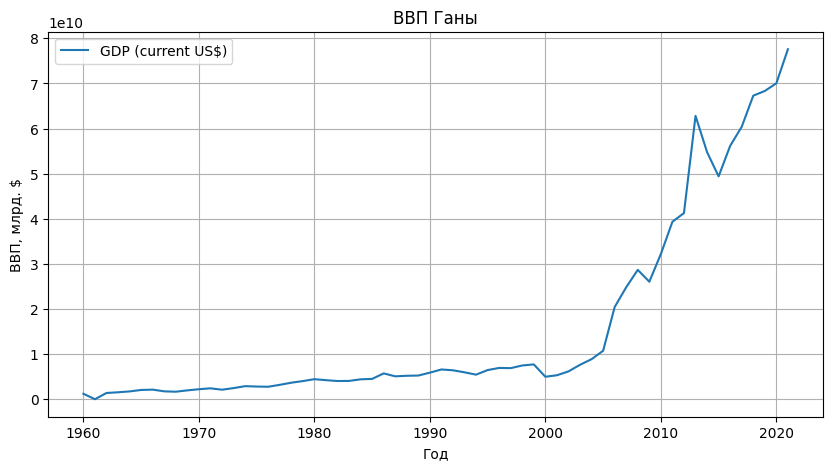

In [4]:
# визуализируем ВВП Ганы по годам
_, ax_line = plt.subplots(figsize=(10, 5))
ax_line = sns.lineplot(data=gdp, ax=ax_line)
ax_line.set(
    title='ВВП Ганы', 
    xlabel='Год', 
    ylabel='ВВП, ' + 'млрд. \$'
)
ax_line.grid();

На графике выше ↑ видно, что тренд возрастающий на всем протяжении, приблизительно, с 2000 года значительный рост.

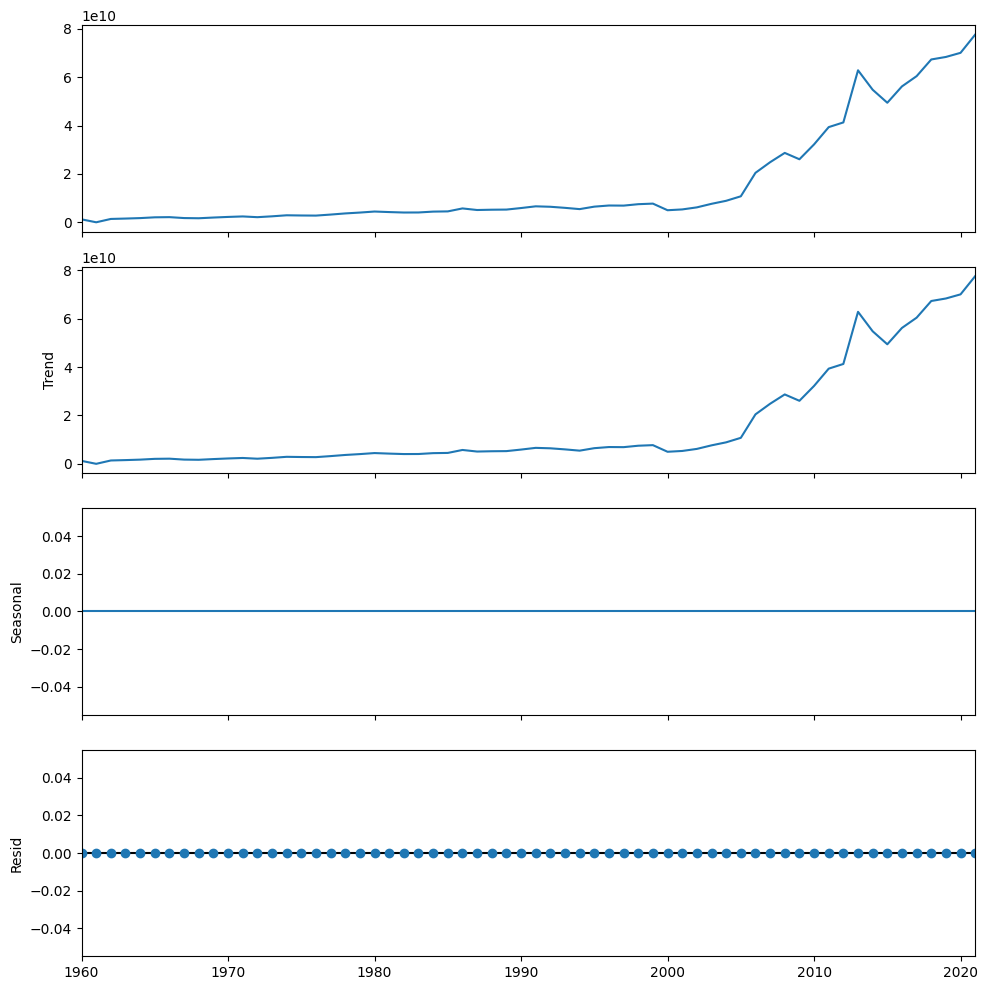

In [5]:
plt.rcParams['figure.figsize'] = 10, 10

# производим декомпозицию временного ряда
decomposition = seasonal.seasonal_decompose(gdp)
decomposition.plot();

Из графиков выше ↑ видно и можно сказать, что есть только восходящий (нарастающий) тренд.

In [6]:
# разбиение выборки
train_df, test_df = gdp[:-3], gdp[-3:]

# выводим результат
print(f'Размерность тренировочной выборки: {train_df.shape}')
print(f'Размерность тестовой выборки: {test_df.shape}')

Размерность тренировочной выборки: (59, 1)
Размерность тестовой выборки: (3, 1)


In [7]:
# прибираемся немного
del url_data, ax_line, decomposition
gc.collect();

### **Выводы:**

Предварительная оценка, при анализе исходного ряда наблюдается:

* тренд;
* отсутствие сезонности;
* отсутствие шума, остатки сосредоточены около 0.

---

### 1.2. Модель SMA (простое скользящее среднее)

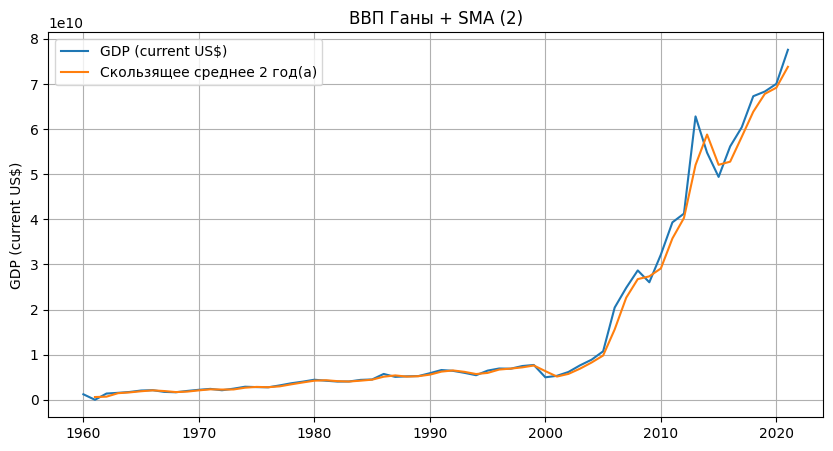

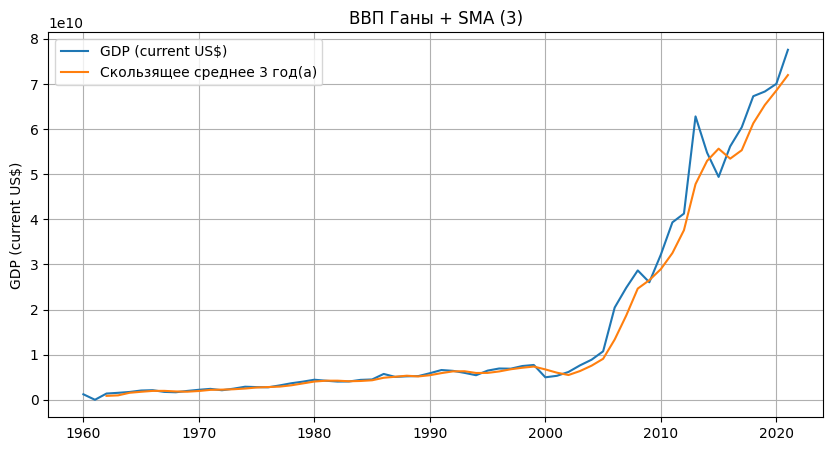

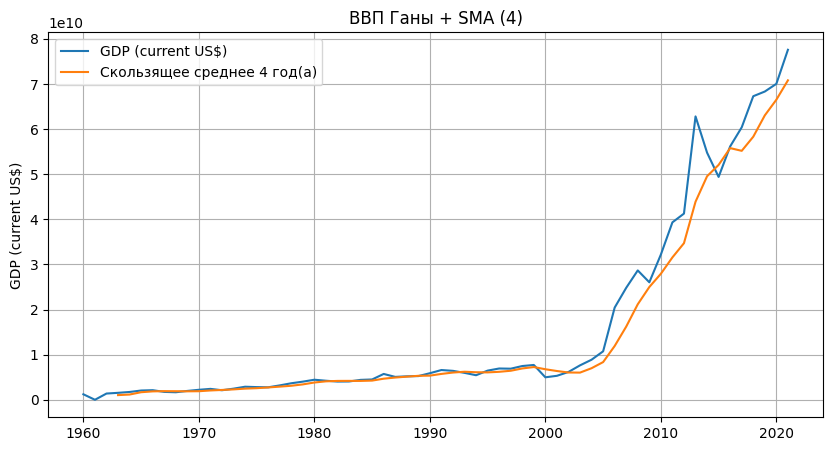

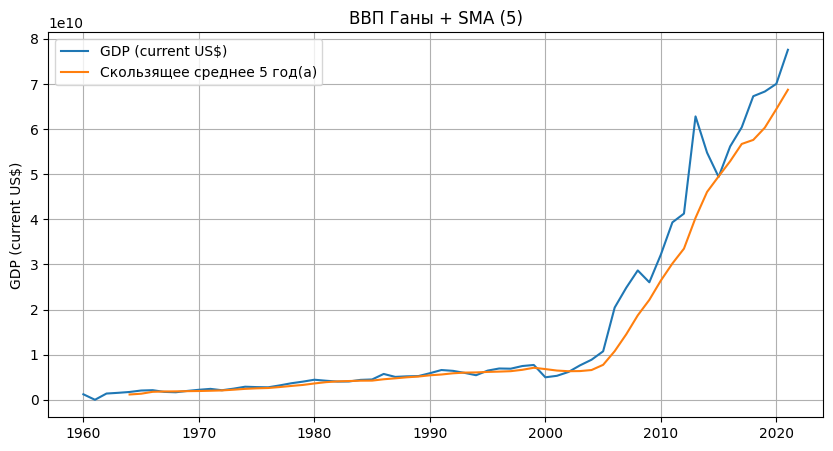

In [8]:
# строим SMA с окнами в диапазоне от 2 до 5, включительно
for i in range(2, 6):
    # задаём полотно
    fig, ax_line = plt.subplots(figsize=(10, 5))
    
    # строим график основных данных
    ax_line = sns.lineplot(x=gdp.index, y=gdp[gdp.columns[0]], label=gdp.columns[0])

    # строим график SMA
    ma = gdp.rolling(i).mean()
    ax_line = sns.lineplot(x=ma.index, y=ma[gdp.columns[0]], label='Скользящее среднее '  + str(i) + ' год(а)')
    
    # формируем заголовок и сетку
    ax_line.grid()
    _ = plt.title('ВВП Ганы + SMA (' + str(i) + ')')

Скользящее среднее помогает избавить временной ряд от выбросов и лишнего шума, это упрощает визуальный анализ, но вместе с тем, с увеличением "окна", оборотная сторона медали - приходится платить потерей данных, причем, существенно. Модель SМА с окном в 5 лет очень сильно сгладила график, потеряна часть данных - скачок в период 2008-2009, особенно в 2013-2015 гг., SМА с окном в 2 года сгладила данные более аккуратно, сохранив пики.

In [9]:
# прибираемся немного
del i, fig, ax_line, ma
gc.collect();

### **Выводы:**

* С 1960 по 2002-2003 наблюдается очень медленный прирост ВВП ("ползучий" график), темп роста низкий;

* Резкий восходящий тренд прослеживается с 2004-2005 года, темп роста  высокий (кривая резко идет вверх);

* Данные тренда SMA подтверждены на декомпозиции временного ряда ранее.

---

### 1.3. Стационарность ряда, выбор модели, подбор гиперпараметров с помощью `pmdarima`

Оценим стационарность ряда с помощью функции `get_adfuller_test` (тест Дики-Фуллера):

In [10]:
# проверяем ряд на стационарность
get_adfuller_test(train_df, 2)

ADF Statistic: 0.6529066974885349
p-value: 0.9888496277665572
Critical Values: {'1%': -3.5745892596209488, '5%': -2.9239543084490744, '10%': -2.6000391840277777}
При пороге '5%' есть единичные корни, ряд НЕ стационарен


In [11]:
# проверяем ряд на стационарность, интегрированный ряд 1-го порядка
get_adfuller_test(train_df.diff().dropna(), 2)

ADF Statistic: -1.6702483038320777
p-value: 0.446502932971389
Critical Values: {'1%': -3.568485864, '5%': -2.92135992, '10%': -2.5986616}
При пороге '5%' есть единичные корни, ряд НЕ стационарен


In [12]:
# проверяем ряд на стационарность, интегрированный ряд 2-го порядка
get_adfuller_test(train_df.diff(2).dropna(), 2)

ADF Statistic: -3.5836708658260297
p-value: 0.006080989753876957
Critical Values: {'1%': -3.584828853223594, '5%': -2.9282991495198907, '10%': -2.6023438271604937}
При пороге '5%' единичных корней нет, ряд СТАЦИОНАРЕН


Интегрированный ряд 2-го порядка ряд стал стационарным, принимаем $d = 2$, т.к. ряд нестационарный, отсутствует сезонность и не требуется учитывать экзогенные переменные, то можно применить модель *ARIMA*.

Посмотрим на коррелограммы:

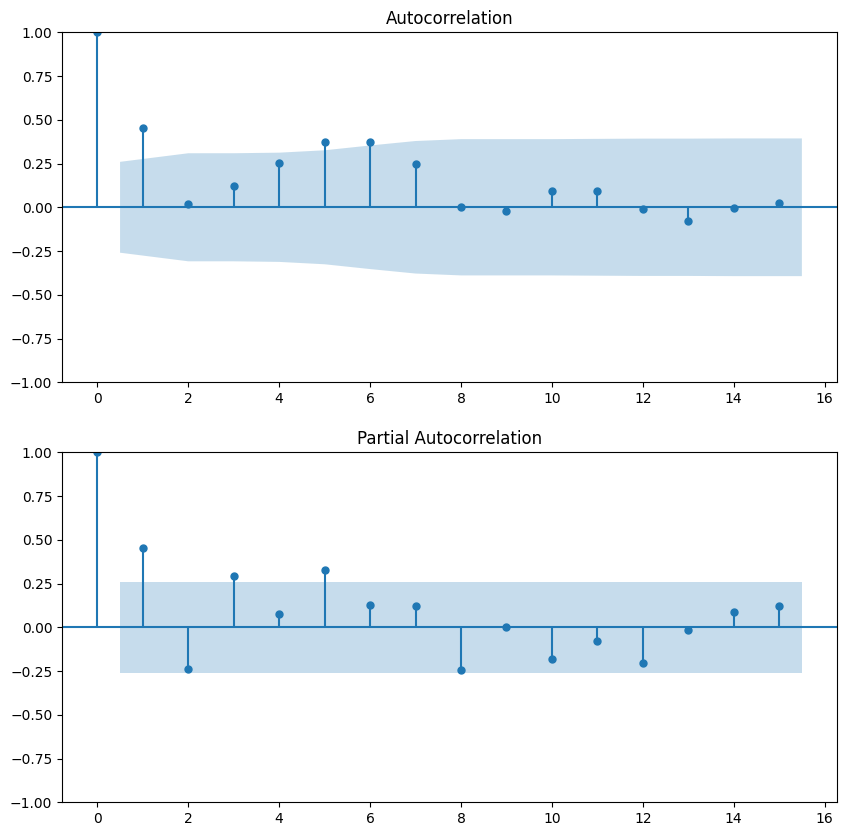

In [13]:
get_correlograms(train_df.diff(2).dropna())

На основании графиков автокорреляции и частичной автокорреляции выбираем параметры для модели:

* $p = 1$,
* $q = 1$.

In [14]:
# создаём объект класса ARIMA, обучаем модель
ARIMA_1_2_1 = model.ARIMA(train_df, order=(1, 2, 1));
ARIMA_1_2_1_fit = ARIMA_1_2_1.fit()

# выводим результат
ARIMA_1_2_1_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:      GDP (current US$)   No. Observations:                   59
Model:                 ARIMA(1, 2, 1)   Log Likelihood               -1339.208
Date:                Mon, 31 Jul 2023   AIC                           2684.416
Time:                        14:49:50   BIC                           2690.545
Sample:                    01-01-1960   HQIC                          2686.798
                         - 01-01-2018                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1775      0.082     -2.159      0.031      -0.339      -0.016
ma.L1         -0.8688      0.046    -19.069      0.000      -0.958      -0.780
sigma2       1.96e+19   2.13e-22    9.2e+40      0.000    1.96e+19    1.96e+19
===================================================================================
Ljung-Box (L1) (Q):                   0.17   Jarque-Bera (JB):               276.42
Prob(Q):                              0.68   Prob(JB):                         0.00
Heteroskedasticity (H):             325.65   Skew:                             1.34
Prob(H) (two-sided):                  0.00   Kurtosis:                        13.45
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 3.49e+56. Standard errors may be unstable.
"""

Попробуем подобрать оптимальные гиперпараметры для модели *ARIMA*:

* Параметр $p$: в диапазоне [1-10],
* Параметр $d$: в диапазоне [1-10],
* Параметр $q$: в диапазоне [1-10],
* Задаем отсутствие сезонности: **m = 0** и **seasonal=False**,
* Фиксируем **random_state** и **n_jobs**, чтобы результаты были без учёта стохастического влияния и с максимальной производительностью, делаем вывод расчётов **trace** и подавляем ошибки **error_action='ignore'**, **suppress_warnings=True**,
* Чтобы сократить вдвое время расчётов убираем расчёты с интерсептом: **with_intercept=False**.

In [15]:
# ищем лучшие гиперпараметры
AUTO_ARIMA_1_2_1 = pm.auto_arima(
    train_df, 
    start_p=1, d=2, start_q=1,
    test='adf',
    max_p=10, max_d=10, 
    max_q=10, 
    m=0, seasonal=False, 
    trace=True,
    error_action='ignore', 
    suppress_warnings=True, 
    n_jobs=CPU_ALL, 
    random_state=RANDOM_SEED_42, 
    with_intercept=False
)

# выводим результат
AUTO_ARIMA_1_2_1.summary()

Performing stepwise search to minimize aic
 ARIMA(1,2,1)(0,0,0)[0]             : AIC=2684.416, Time=0.03 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=2719.959, Time=0.01 sec
 ARIMA(1,2,0)(0,0,0)[0]             : AIC=2704.667, Time=0.01 sec
 ARIMA(0,2,1)(0,0,0)[0]             : AIC=2683.622, Time=0.02 sec
 ARIMA(0,2,2)(0,0,0)[0]             : AIC=2681.414, Time=0.02 sec
 ARIMA(1,2,2)(0,0,0)[0]             : AIC=2680.988, Time=0.06 sec
 ARIMA(2,2,2)(0,0,0)[0]             : AIC=inf, Time=0.08 sec
 ARIMA(1,2,3)(0,0,0)[0]             : AIC=2680.765, Time=0.06 sec
 ARIMA(0,2,3)(0,0,0)[0]             : AIC=2686.992, Time=0.03 sec
 ARIMA(2,2,3)(0,0,0)[0]             : AIC=2682.648, Time=0.10 sec
 ARIMA(1,2,4)(0,0,0)[0]             : AIC=2682.800, Time=0.07 sec
 ARIMA(0,2,4)(0,0,0)[0]             : AIC=2688.234, Time=0.07 sec
 ARIMA(2,2,4)(0,0,0)[0]             : AIC=2683.409, Time=0.14 sec
 ARIMA(1,2,3)(0,0,0)[0] intercept   : AIC=2686.657, Time=0.11 sec

Best model:  ARIMA(1,2,3)(0,0,0)[0]  

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   59
Model:               SARIMAX(1, 2, 3)   Log Likelihood               -1335.382
Date:                Mon, 31 Jul 2023   AIC                           2680.765
Time:                        14:49:50   BIC                           2690.980
Sample:                    01-01-1960   HQIC                          2684.735
                         - 01-01-2018                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5682      0.163     -3.487      0.000      -0.888      -0.249
ma.L1         -0.4241      0.235     -1.803      0.071      -0.885       0.037
ma.L2         -0.8256      0.169     -4.886      0.000      -1.157      -0.494
ma.L3          0.5193      0.137      3.790      0.000       0.251       0.788
sigma2      1.868e+19   8.55e-21   2.18e+39      0.000    1.87e+19    1.87e+19
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):               173.00
Prob(Q):                              0.98   Prob(JB):                         0.00
Heteroskedasticity (H):             141.34   Skew:                             1.18
Prob(H) (two-sided):                  0.00   Kurtosis:                        11.20
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 5.43e+55. Standard errors may be unstable.
"""

In [16]:
# прибираемся немного
del ARIMA_1_2_1, ARIMA_1_2_1_fit
gc.collect();

### **Выводы:**

Наилучшие параметры получены для модели *ARIMA(1, 2, 3)*, т.к. коэффициент *AIC* для неё чуть меньше, чем *AIC* для *ARIMA(1, 2, 1)*: 2680.765 < 2684.416.

**Меньше, значит, лучше**, оптимальные гиперпараметры для *ARIMA* - *(1, 2, 3)*.

---

### 1.4. Построение оптимальной модели и предсказания для тестовой выборки

In [17]:
# создаём объект класса ARIMA, обучаем модель с лучшими гиперпараметрами
ARIMA_opt = model.ARIMA(
    train_df, 
    order=AUTO_ARIMA_1_2_1.get_params()['order']
)
ARIMA_opt_fit = ARIMA_opt.fit()

# выводим результат
ARIMA_opt_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:      GDP (current US$)   No. Observations:                   59
Model:                 ARIMA(1, 2, 3)   Log Likelihood               -1335.382
Date:                Mon, 31 Jul 2023   AIC                           2680.765
Time:                        14:49:51   BIC                           2690.980
Sample:                    01-01-1960   HQIC                          2684.735
                         - 01-01-2018                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5682      0.163     -3.487      0.000      -0.888      -0.249
ma.L1         -0.4241      0.235     -1.803      0.071      -0.885       0.037
ma.L2         -0.8256      0.169     -4.886      0.000      -1.157      -0.494
ma.L3          0.5193      0.137      3.790      0.000       0.251       0.788
sigma2      1.868e+19   8.55e-21   2.18e+39      0.000    1.87e+19    1.87e+19
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):               173.00
Prob(Q):                              0.98   Prob(JB):                         0.00
Heteroskedasticity (H):             141.34   Skew:                             1.18
Prob(H) (two-sided):                  0.00   Kurtosis:                        11.20
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 5.43e+55. Standard errors may be unstable.
"""

Вычислим для оптимальной модели предсказание:

In [18]:
# создаём отдельный датафрейм с индексами первоначального 
pred_ARIMA_opt_fit = pd.DataFrame(index=gdp.index)

# вычисляем предсказание для тестовой выборки в новый признак 'model_preds'
pred_ARIMA_opt_fit['model_preds'] = ARIMA_opt_fit.predict(
    start=test_df.index[0], 
    end=test_df.index[-1]
)

# переносим истинные значения в датафрейм предсказания
pred_ARIMA_opt_fit[gdp.columns[0]] = gdp[gdp.columns[0]]

# формируем доверительный интервал в 95%
forecast = ARIMA_opt_fit.get_forecast(len(test_df.index))
forecast_df = forecast.conf_int(alpha = 0.05)   # Confidence level of 95%

# добавляем доверительный интервал для 3 последних значений
pred_ARIMA_opt_fit.at[test_df.index, 'model_preds_lower'] = forecast_df['lower GDP (current US$)']
pred_ARIMA_opt_fit.at[test_df.index, 'model_preds_upper'] = forecast_df['upper GDP (current US$)']
pred_ARIMA_opt_fit.tail()

,model_preds,GDP (current US$),model_preds_lower,model_preds_upper
2017-01-01,NaN,6.040638e+10,NaN,NaN
2018-01-01,NaN,6.729928e+10,NaN,NaN
2019-01-01,6.789080e+10,6.833754e+10,5.941329e+10,7.636831e+10
2020-01-01,7.253326e+10,7.004320e+10,6.050774e+10,8.455877e+10
2021-01-01,7.517348e+10,7.759428e+10,6.155656e+10,8.879040e+10


In [19]:
# прибираемся немного
del AUTO_ARIMA_1_2_1, forecast, forecast_df
# del ARIMA_opt, ARIMA_opt_fit
gc.collect();

---

### 1.5. Построение графиков истинного и предсказанного поведения временного ряда

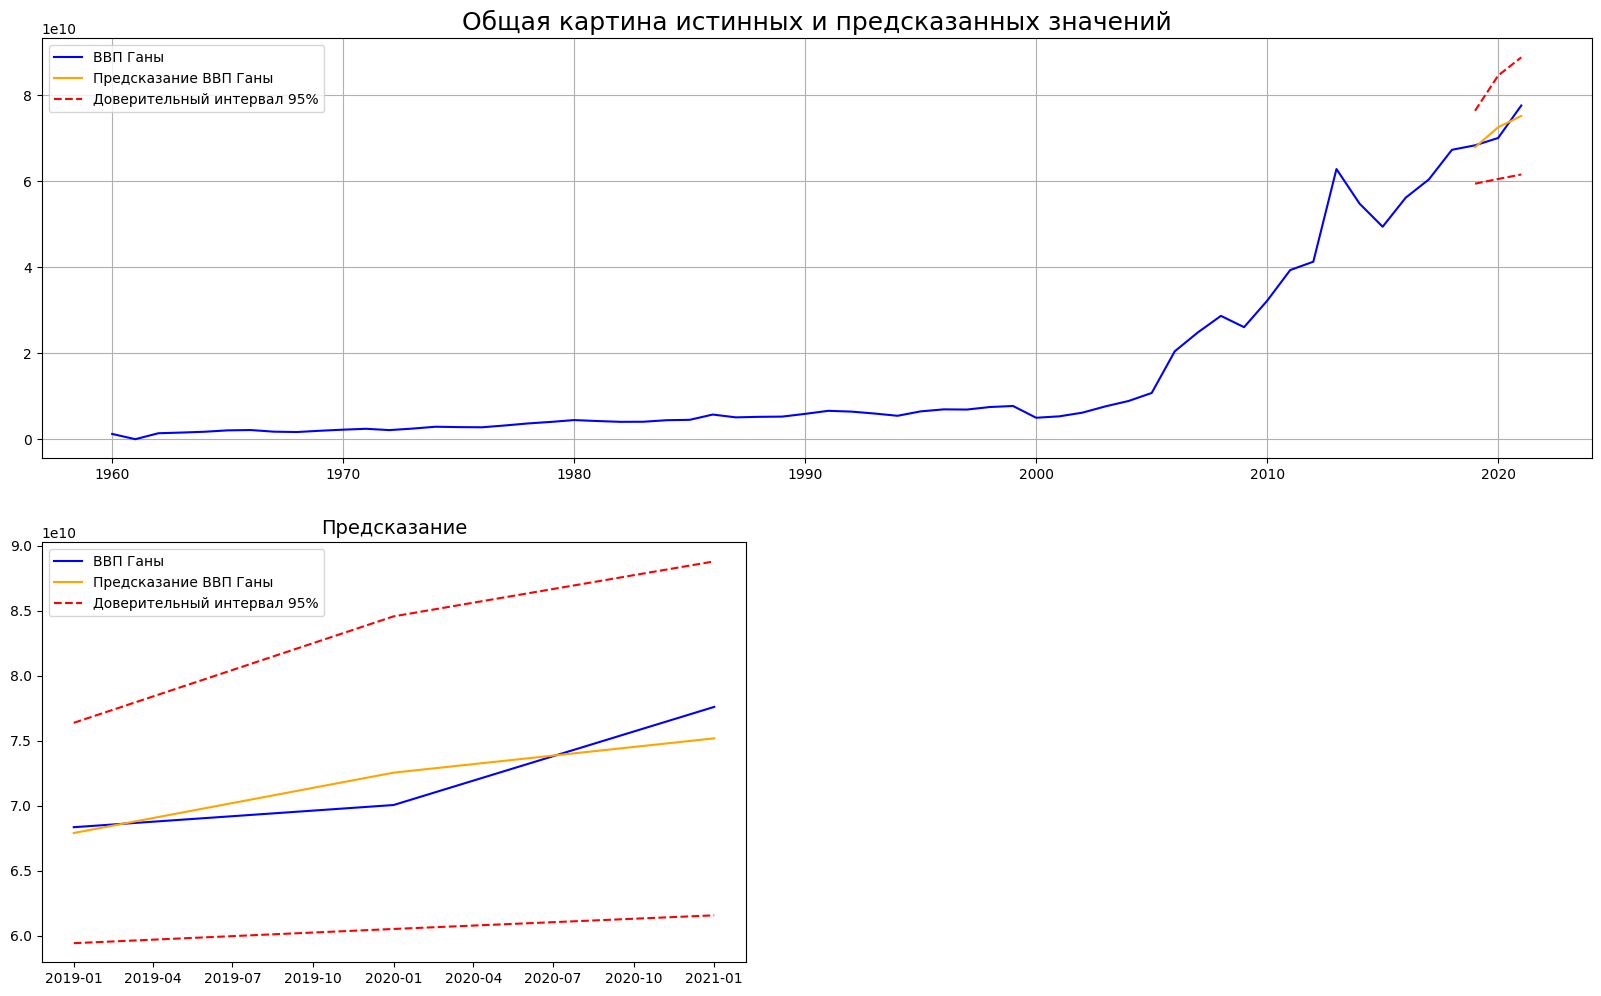

In [20]:
get_plot_time_series_predicted(
    pred_ARIMA_opt_fit, test_df, 
    'Общая картина истинных и предсказанных значений', 'Предсказание'
)

### **Выводы:**

Построенная модель *ARIMA(1, 2, 3)* уловила динамику и тренд временного ряда и довольно близко предсказала значения ВВП Ганы за 2019-2021 годы к истинным значениям, в 2019 году предсказание модели было наиболее близко к фактической величине.

---

### 1.6. Метрики, выводы

In [21]:
# метрики SMA(2)
get_metrics(test_df, gdp['GDP (current US$)'].rolling(2).mean().iloc[-3:], train_df)

MAPE: 2.28 %
MSE: 5.08384e+20 $^2
RMSE: 2.25474e+09 $
R2: 0.69
MASE: 0.89


In [22]:
# метрики оптимизированной ARIMA(1, 2, 3)
get_metrics(test_df, pred_ARIMA_opt_fit['model_preds'][-3:], train_df)

MAPE: 2.44 %
MSE: 4.08675e+20 $^2
RMSE: 2.02157e+09 $
R2: 0.75
MASE: 0.92


### **Выводы:**

Метрики для *SMA(2)* и оптимизированной *ARIMA (1, 2, 3)* показывают, что несмотря на лучшую метрику MAE, модель *SMA* показывает результат, в целом, хуже, чем оптимизированная модель *ARIMA*.

В таблице сведены метрики по каждой модели:

<center>

| Метрика | <div style="width:200px">SMA(2)</div> | <div style="width:200px">ARIMA(1, 2, 3)</div> |
| :---: | :---: | :---: |
| $AIC$ | - | 2680.513 |
| $MAPE, \%$ | <font color='LightSeaGreen'>**2.28**</font> | <font color='Tomato'>**2.44**</font> |
| $MSE, \$^2$ | 5.08384e+20 | <font color='LightSeaGreen'>**4.08675e+20**</font> |
| $RMSE, \$$ | 2.25474e+09 | <font color='LightSeaGreen'>**2.02157e+09**</font> |
| $R_2$ | 0.69 | <font color='LightSeaGreen'>**0.75**</font> |
| $MASE$ | 0.89 | <font color='LightSeaGreen'>**0.92**</font> |

</center>

<br>

---

## 2. Интерполяция и сэмлирование.<br> Построение модели на интерполированных данных

### **Задачи:**

1. Проверьте данные на наличие пропущенных дат. Помимо визуального способа, это можно сделать с помощью метода **[DataFrame.asfreq()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.asfreq.html)**, передав в него параметр частоты, например '*d*' — день, '*m*' — месяц. Все алиасы для параметров частоты доступны **[по ссылке](https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#timeseries-offset-aliases)**.

2. Проверьте данные на наличие пропущенных значений с помощью:

    ```py
    Series.isna().sum()
    ```

3. Обратите внимание, что иногда пропуски в данных могут быть заполнены нулями. Сделайте проверку на наличие нулевых значений и в случае нахождения замените их на *NaN*. Воспользуйтесь кодом ниже:

    ```py
    import numpy as np
    df['GDP (current US$)'] = df['GDP (current US$)'].apply(lambda x: np.nan if x==0 else x)
    ```

4. Для заполнения пропусков выполните интерполяцию с использованием метода `.interpolate()`:

    ```py
    df['GDP (current US$)'].interpolate(method='linear')
    ```

5. Проверьте полученный ряд на стационарность, определите параметры модели *ARIMA / ARMA* и запустите модель.

6. Изменился ли *AIC* критерий построенной модели по сравнению с моделью на неинтерполированных данных? Сделайте вывод.

---

### 2.1. Проверка на пропуски дат

Проверяем данные с помощью **DataFrame.asfreq()** (параметр *freq* указываем как начало каждого года, то есть '*YS*' или '*AS*', из документации):

In [23]:
# т.к. метод .asfreq() возвращает новый датафрейм, сохраняем его
gdp_mod = gdp.asfreq(freq='YS')
gdp_mod

,GDP (current US$)
1960-01-01,1.217087e+09
1961-01-01,0.000000e+00
1962-01-01,1.382353e+09
1963-01-01,1.540616e+09
1964-01-01,1.731092e+09
...,...
2017-01-01,6.040638e+10
2018-01-01,6.729928e+10
2019-01-01,6.833754e+10
2020-01-01,7.004320e+10


### **Выводы:**

Без изменений, пропусков дат нет.

---

### 2.2. Проверка на наличие пропущенных значений

In [24]:
gdp_mod.isna().sum()

GDP (current US$)    0
dtype: int64

### 2.3. Проверка на наличие пропущенных значений нулями, замена на *NaN*

Визуально сразу имеется единственное значение, т.к. иногда пропуски в данных могут быть заполнены нулями, проверим дополнительно наличие ещё подобных значений. Сделаем проверку на наличие нулевых значений и в случае нахождения, заменим их на *NaN*:

In [25]:
gdp_mod[gdp_mod[gdp_mod.columns[0]]==0]

,GDP (current US$)
1961-01-01,0.0


In [26]:
# заменяем нулевые значения
gdp_mod[gdp_mod.columns[0]] = gdp_mod[gdp_mod.columns[0]].apply(lambda x: np.nan if x==0 else x)

# выводим результат
gdp_mod[gdp_mod[gdp_mod.columns[0]].isna()==True]

,GDP (current US$)
1961-01-01,NaN


### 2.4. Интерполяция *NaN*-значений

После заполнения нулей значением '*NaN*' был выявлен один пропуск, заполним его:

In [27]:
# интерполируем значение
gdp_mod[gdp_mod.columns[0]].interpolate(method='linear', inplace=True)

# выводим результат
gdp_mod.isna().sum()

GDP (current US$)    0
dtype: int64

Выполним разбиение датасета с обновлённой выборкой:

In [28]:
# разбиение выборки
train_df, test_df = gdp_mod[:-3], gdp_mod[-3:]

# выводим результат
print(f'Размерность тренировочной выборки: {train_df.shape}')
print(f'Размерность тестовой выборки: {test_df.shape}')

Размерность тренировочной выборки: (59, 1)
Размерность тестовой выборки: (3, 1)


### 2.5. Стационарность ряда, выбор модели, подбор гиперпараметров с помощью `pmdarima`

Оценим стационарность ряда (тест Дики-Фуллера):

In [29]:
# проверяем ряд на стационарность
get_adfuller_test(train_df, 2)

ADF Statistic: 0.8030073326980129
p-value: 0.9916845572455877
Critical Values: {'1%': -3.5745892596209488, '5%': -2.9239543084490744, '10%': -2.6000391840277777}
При пороге '5%' есть единичные корни, ряд НЕ стационарен


In [30]:
# проверяем ряд на стационарность, интегрированный ряд 1-го порядка
get_adfuller_test(train_df.diff().dropna(), 2)

ADF Statistic: -1.8255652246435998
p-value: 0.36784515276563423
Critical Values: {'1%': -3.568485864, '5%': -2.92135992, '10%': -2.5986616}
При пороге '5%' есть единичные корни, ряд НЕ стационарен


In [31]:
# проверяем ряд на стационарность, интегрированный ряд 2-го порядка
get_adfuller_test(train_df.diff(2).dropna(), 2)

ADF Statistic: -3.999803440949147
p-value: 0.0014115408436661371
Critical Values: {'1%': -3.584828853223594, '5%': -2.9282991495198907, '10%': -2.6023438271604937}
При пороге '5%' единичных корней нет, ряд СТАЦИОНАРЕН


Интегрированный ряд 2-го порядка ряд стал стационарным, принимаем $d = 2$, т.к. ряд нестационарный, отсутствует сезонность и не требуется учитывать экзогенные переменные, то можно применить модель *ARIMA*.

Посмотрим на коррелограммы:

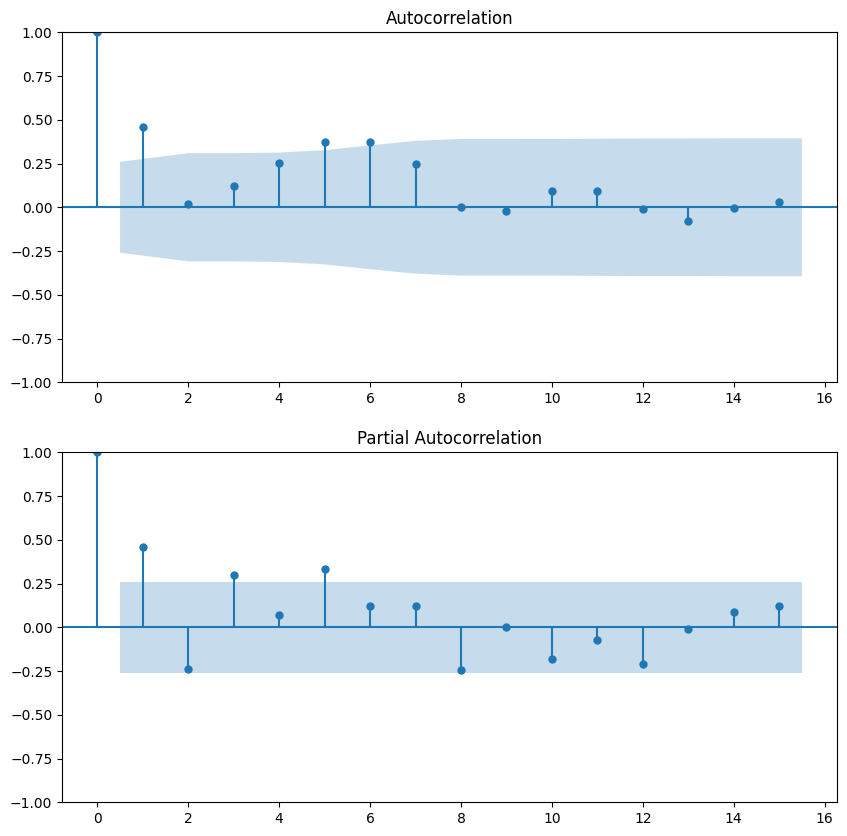

In [32]:
get_correlograms(train_df.diff(2).dropna())

На основании графиков автокорреляции и частичной автокорреляции выбираем параметры для модели:

* $p = 1$,
* $q = 1$.

In [33]:
# создаём объект класса ARIMA, обучаем модель на интерполированном признаке
ARIMA_1_2_1_mod = model.ARIMA(train_df, order=(1, 2, 1));
ARIMA_1_2_1_mod_fit = ARIMA_1_2_1_mod.fit()

# выводим результат
ARIMA_1_2_1_mod_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:      GDP (current US$)   No. Observations:                   59
Model:                 ARIMA(1, 2, 1)   Log Likelihood               -1339.188
Date:                Mon, 31 Jul 2023   AIC                           2684.377
Time:                        14:49:52   BIC                           2690.506
Sample:                    01-01-1960   HQIC                          2686.759
                         - 01-01-2018                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1750      0.082     -2.127      0.033      -0.336      -0.014
ma.L1         -0.8690      0.046    -19.050      0.000      -0.958      -0.780
sigma2       1.96e+19   2.13e-22   9.21e+40      0.000    1.96e+19    1.96e+19
===================================================================================
Ljung-Box (L1) (Q):                   0.17   Jarque-Bera (JB):               277.83
Prob(Q):                              0.68   Prob(JB):                         0.00
Heteroskedasticity (H):             480.68   Skew:                             1.36
Prob(H) (two-sided):                  0.00   Kurtosis:                        13.47
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 3.5e+56. Standard errors may be unstable.
"""

Метрика *AIC* для *ARIMA(1, 2, 1) с интерполированными значениями* совсем <font color='LightSeaGreen'>**немного улучшилась**</font>, сказывается корректировка ряда ненулевым значением:

* было - 2684.416
* стало - <font color='LightSeaGreen'>**2684.377**</font>

Попробуем подобрать оптимальные гиперпараметры для модели ARIMA:

* Параметр $p$: в диапазоне [1-10],
* Параметр $d$: в диапазоне [1-10],
* Параметр $q$: в диапазоне [1-10],
* Задаем отсутствие сезонности: **m = 0** и **seasonal=False**,
* Фиксируем **random_state** и **n_jobs**, чтобы результаты были без учёта стохастического влияния и с максимальной производительностью, делаем вывод расчётов **trace** и подавляем ошибки **error_action='ignore'**, **suppress_warnings=True**,
* Чтобы сократить вдвое время расчётов убираем расчёты с интерсептом: **with_intercept=False**.

In [34]:
# ищем лучшие гиперпараметры для модели интерполированными значениями
AUTO_ARIMA_1_2_1_mod = pm.auto_arima(
    train_df, 
    start_p=1, d=2, start_q=1,
    test='adf',
    max_p=10, max_d=10, 
    max_q=10, 
    m=0, seasonal=False, 
    trace=True,
    error_action='ignore', 
    suppress_warnings=True, 
    n_jobs=CPU_ALL, 
    random_state=RANDOM_SEED_42, 
    with_intercept=False
)

# выводим результат
AUTO_ARIMA_1_2_1_mod.summary()

Performing stepwise search to minimize aic
 ARIMA(1,2,1)(0,0,0)[0]             : AIC=2684.377, Time=0.02 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=2719.683, Time=0.01 sec
 ARIMA(1,2,0)(0,0,0)[0]             : AIC=2704.584, Time=0.01 sec
 ARIMA(0,2,1)(0,0,0)[0]             : AIC=2683.547, Time=0.02 sec
 ARIMA(0,2,2)(0,0,0)[0]             : AIC=2681.389, Time=0.02 sec
 ARIMA(1,2,2)(0,0,0)[0]             : AIC=2680.921, Time=0.09 sec


 ARIMA(2,2,2)(0,0,0)[0]             : AIC=inf, Time=0.09 sec
 ARIMA(1,2,3)(0,0,0)[0]             : AIC=2680.513, Time=0.06 sec
 ARIMA(0,2,3)(0,0,0)[0]             : AIC=2687.184, Time=0.03 sec
 ARIMA(2,2,3)(0,0,0)[0]             : AIC=2682.393, Time=0.09 sec
 ARIMA(1,2,4)(0,0,0)[0]             : AIC=2682.617, Time=0.08 sec
 ARIMA(0,2,4)(0,0,0)[0]             : AIC=2687.812, Time=0.07 sec
 ARIMA(2,2,4)(0,0,0)[0]             : AIC=2683.040, Time=0.12 sec
 ARIMA(1,2,3)(0,0,0)[0] intercept   : AIC=2686.809, Time=0.15 sec

Best model:  ARIMA(1,2,3)(0,0,0)[0]          
Total fit time: 0.887 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   59
Model:               SARIMAX(1, 2, 3)   Log Likelihood               -1335.257
Date:                Mon, 31 Jul 2023   AIC                           2680.513
Time:                        14:49:53   BIC                           2690.729
Sample:                    01-01-1960   HQIC                          2684.483
                         - 01-01-2018                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5586      0.171     -3.271      0.001      -0.893      -0.224
ma.L1         -0.4271      0.248     -1.724      0.085      -0.913       0.059
ma.L2         -0.8246      0.185     -4.467      0.000      -1.186      -0.463
ma.L3          0.5228      0.135      3.866      0.000       0.258       0.788
sigma2      1.864e+19   1.02e-20   1.84e+39      0.000    1.86e+19    1.86e+19
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):               179.81
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):             434.94   Skew:                             1.19
Prob(H) (two-sided):                  0.00   Kurtosis:                        11.37
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 7.28e+55. Standard errors may be unstable.
"""

In [35]:
# прибираемся немного
del ARIMA_1_2_1_mod, ARIMA_1_2_1_mod_fit
gc.collect();

Наилучшие параметры получены для модели *ARIMA(1, 2, 3) с интерполированными значениями*, т.к. коэффициент *AIC* для неё чуть меньше, чем *AIC* для *ARIMA(1, 2, 1) с интерполированными значениями*: 2680.513 < 2684.377.

**Меньше, значит, лучше**, оптимальные гиперпараметры для *ARIMA с интерполированными значениями* - *(1, 2, 3)*.

Построим оптимальную модель на интерполированном признаке:

In [36]:
# создаём объект класса ARIMA, обучаем модель с лучшими гиперпараметрами
ARIMA_opt_mod = model.ARIMA(
    train_df, 
    order=AUTO_ARIMA_1_2_1_mod.get_params()['order']
)
ARIMA_opt_mod_fit = ARIMA_opt_mod.fit()

# выводим результат
ARIMA_opt_mod_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:      GDP (current US$)   No. Observations:                   59
Model:                 ARIMA(1, 2, 3)   Log Likelihood               -1335.257
Date:                Mon, 31 Jul 2023   AIC                           2680.513
Time:                        14:49:53   BIC                           2690.729
Sample:                    01-01-1960   HQIC                          2684.483
                         - 01-01-2018                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5586      0.171     -3.271      0.001      -0.893      -0.224
ma.L1         -0.4271      0.248     -1.724      0.085      -0.913       0.059
ma.L2         -0.8246      0.185     -4.467      0.000      -1.186      -0.463
ma.L3          0.5228      0.135      3.866      0.000       0.258       0.788
sigma2      1.864e+19   1.02e-20   1.84e+39      0.000    1.86e+19    1.86e+19
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):               179.81
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):             434.94   Skew:                             1.19
Prob(H) (two-sided):                  0.00   Kurtosis:                        11.37
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 7.28e+55. Standard errors may be unstable.
"""

Вычислим для оптимальной модели предсказание:

In [37]:
# создаём отдельный датафрейм с индексами первоначального 
pred_ARIMA_opt_mod_fit = pd.DataFrame(index=gdp_mod.index)

# вычисляем предсказание для тестовой выборки в новый признак 'model_preds'
pred_ARIMA_opt_mod_fit['model_preds'] = ARIMA_opt_mod_fit.predict(
    start=test_df.index[0], 
    end=test_df.index[-1]
)

# переносим истинные значения в датафрейм предсказания
pred_ARIMA_opt_mod_fit[gdp_mod.columns[0]] = gdp_mod[gdp_mod.columns[0]]

# формируем доверительный интервал в 95%
forecast_mod = ARIMA_opt_mod_fit.get_forecast(len(test_df.index))
forecast_df_mod = forecast_mod.conf_int(alpha = 0.05)   # Confidence level of 95%

# добавляем доверительный интервал для 3 последних значений
pred_ARIMA_opt_mod_fit.at[test_df.index, 'model_preds_lower'] = forecast_df_mod['lower GDP (current US$)']
pred_ARIMA_opt_mod_fit.at[test_df.index, 'model_preds_upper'] = forecast_df_mod['upper GDP (current US$)']
pred_ARIMA_opt_mod_fit.tail()

,model_preds,GDP (current US$),model_preds_lower,model_preds_upper
2017-01-01,NaN,6.040638e+10,NaN,NaN
2018-01-01,NaN,6.729928e+10,NaN,NaN
2019-01-01,6.781358e+10,6.833754e+10,5.934528e+10,7.628189e+10
2020-01-01,7.249485e+10,7.004320e+10,6.044242e+10,8.454729e+10
2021-01-01,7.509393e+10,7.759428e+10,6.145217e+10,8.873569e+10


In [38]:
# прибираемся немного
del AUTO_ARIMA_1_2_1_mod, forecast_mod, forecast_df_mod
# del ARIMA_opt_mod, ARIMA_opt_mod_fit
gc.collect();

Для полноты картины построим график предсказания и убедимся, что <font color='LightSeaGreen'>**отличий визуально нет**</font>, т.к. '*AIC*' не изменился, по сравнению с предыдущей оптимизированной моделью *ARIMA*:

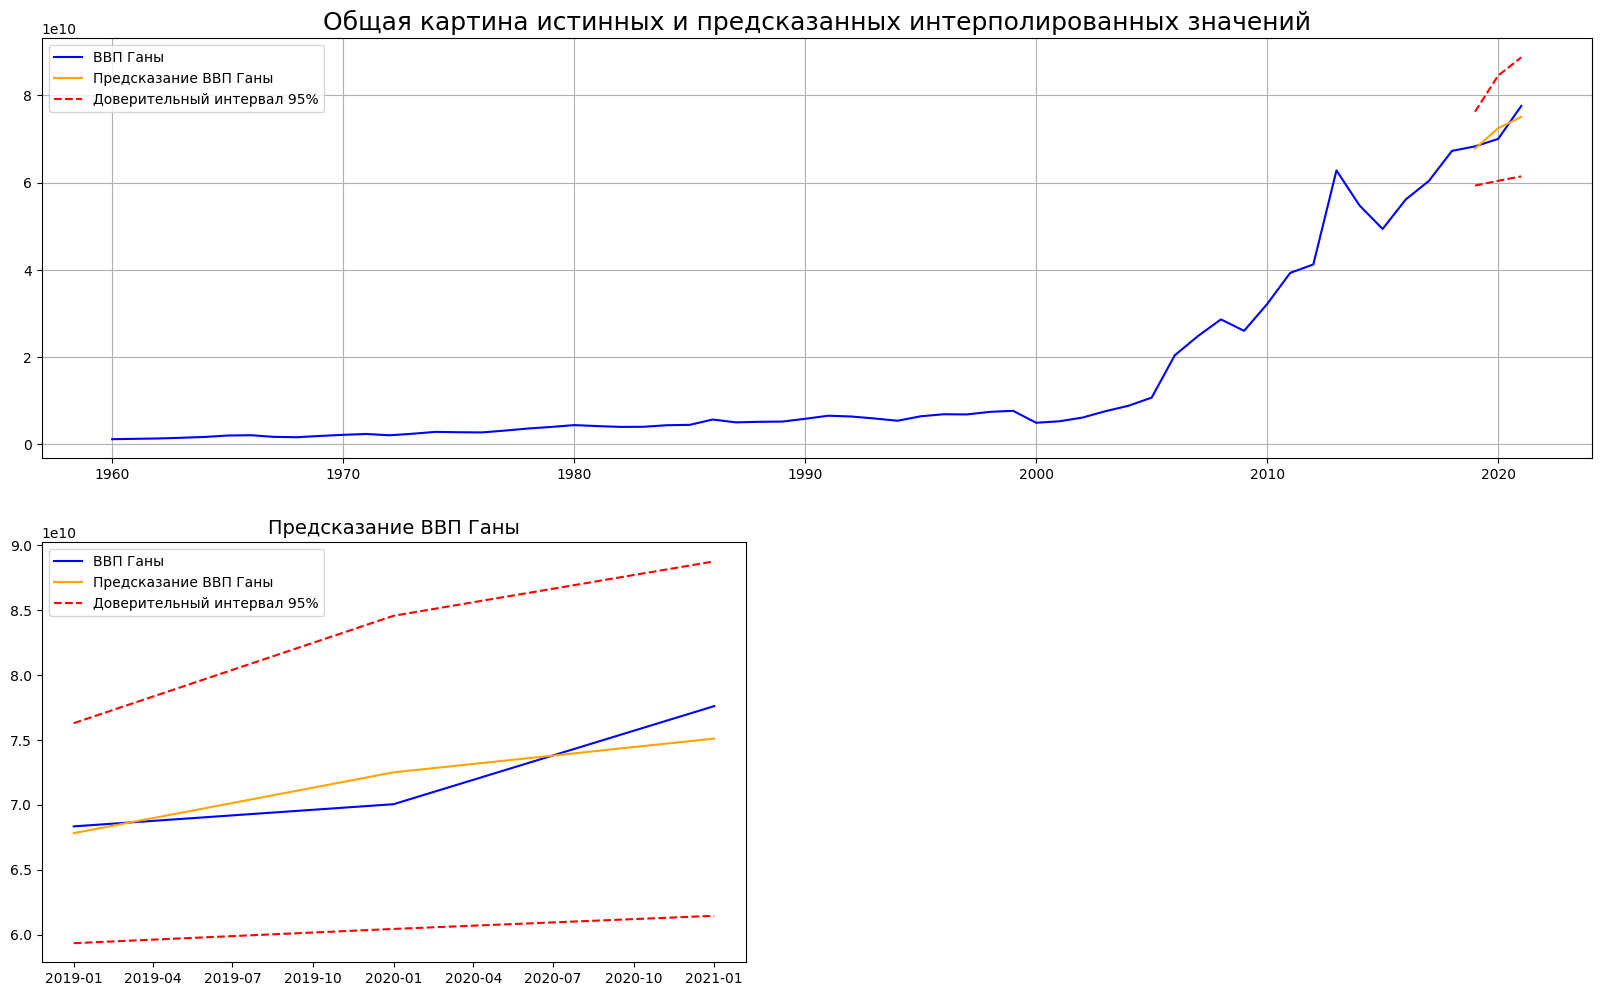

In [39]:
get_plot_time_series_predicted(
    pred_ARIMA_opt_mod_fit, test_df, 
    'Общая картина истинных и предсказанных интерполированных значений', 'Предсказание ВВП Ганы'
)

### **Выводы:**

Без изменений.

---

### 2.6. Метрики, выводы

In [40]:
# метрики оптимизированной ARIMA с интерполированными значениями
get_metrics(test_df, pred_ARIMA_opt_mod_fit['model_preds'][-3:], train_df)

MAPE: 2.50 %
MSE: 4.17896e+20 $^2
RMSE: 2.04425e+09 $
R2: 0.74
MASE: 0.96


### **Выводы:**

Метрики для оптимизированной *ARIMA с интерполированными значениями* показывают небольшую просадку по всем метрикам, кроме *MASE*. Просадку легко объяснить тем, что вместо 0 значения, теперь 9-значное значение, что не может не вызывать минимальную корректировку метрик. И тем, не менее, новая оптимизированная модель *ARIMA на интерполированном признаке* показывает метрику *MASE* лучше, чем модель оптимизированной *ARIMA на первоначальных признаках*.

А, значит, новая модель, на интерполированных признаках - **лучшая**, хоть, и *AIC* не изменился.

В таблице сведены метрики по каждой модели:

<center>

| Метрика | <div style="width:200px">ARIMA(1, 2, 3)<br>с интерполяцией</div> | <div style="width:200px">ARIMA(1, 2, 3)</div> |
| :---: | :---: | :---: |
| $AIC$ | 2680.513 | 2680.513 |
| $MAPE, \%$ | 2.50 | 2.44|
| $MSE, \$^2$ | 4.17896e+20 | 4.08675e+20 |
| $RMSE, \$$ | 2.04425e+09 | 2.02157e+09 |
| $R_2$ | 0.74 | 0.75 |
| $MASE$ | <font color='LightSeaGreen'>**0.96**</font> | 0.92 |

</center>

<br>

---

## 3. Гетероскедатичность

### **Задачи:**

1. Посчитайте волатильность для вашего временного ряда.

2. Используйте *GARCH*-модель для предсказания волатильности.

3. Используйте линейную регрессию для получения прогноза.

4. Визуализируйте полученное предсказание вместе с фактическим значением.

5. Сравните результаты и сделайте выводы.

6. Почему результат модели *GARCH* получился именно таким?

---

### 3.1. Волатильность

In [41]:
# вычисляем волатильность временного ряда
gdp_vol = pd.DataFrame(
    gdp_mod[gdp_mod.columns[0]].pct_change(1).mul(100).abs().dropna().rename('GDP_vol')
)

# выводим результат
gdp_vol.head()

,GDP_vol
1961-01-01,6.789413
1962-01-01,6.357759
1963-01-01,11.448835
1964-01-01,12.363636
1965-01-01,18.608414


Проверим ряд на **гетероскедастичность** т.е. на неоднородность наблюдений, выражающаяся в неодинаковой дисперсии. Для этого создадим вспомогательный признак '*GDP_vol_sqrd*', где будут находиться квадраты значений, отобразим их на графике:

In [42]:
# формируем вспомогательный признак
gdp_vol['GDP_vol_sqrd'] = gdp_vol['GDP_vol'].apply(lambda x: x**2)

# выводим результат
gdp_vol.head()

,GDP_vol,GDP_vol_sqrd
1961-01-01,6.789413,46.096130
1962-01-01,6.357759,40.421095
1963-01-01,11.448835,131.075819
1964-01-01,12.363636,152.859504
1965-01-01,18.608414,346.273081


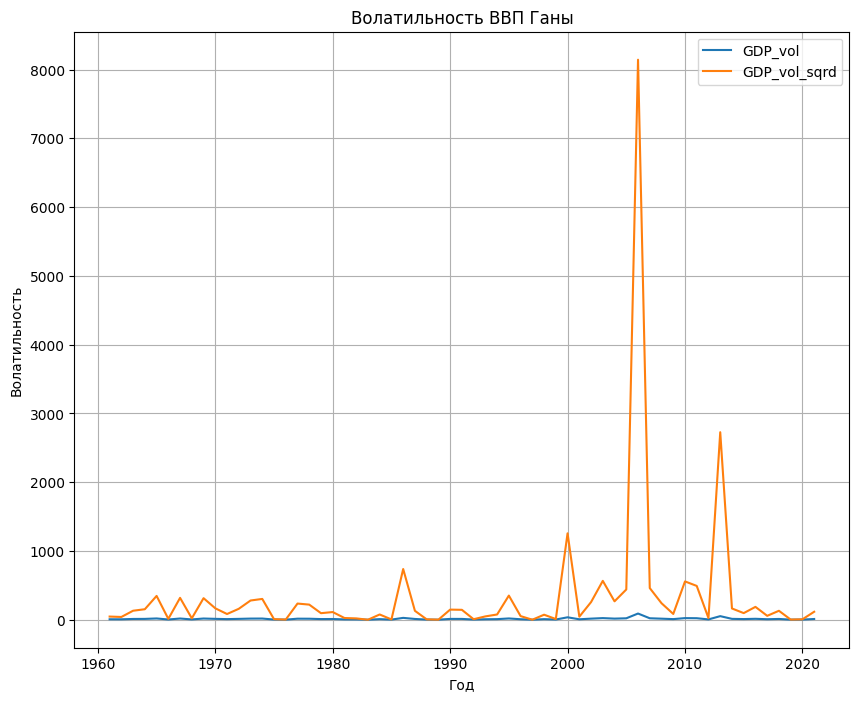

In [43]:
# задаём полотно
fig, ax_line = plt.subplots(figsize=(10, 8))

# строим графики
ax_line = sns.lineplot(
    x=gdp_vol.index, y=gdp_vol[gdp_vol.columns[0]], label=gdp_vol.columns[0])
ax_line = sns.lineplot(
    x=gdp_vol.index, y=gdp_vol[gdp_vol.columns[1]], label=gdp_vol.columns[1])

# формируем заголовок и сетку
ax_line.set(
    title='Волатильность ВВП Ганы', 
    xlabel='Год', 
    ylabel='Волатильность'
)

ax_line.grid();

In [44]:
# пиковые значения волатильности
print(f"{round(gdp_vol['GDP_vol'].loc['1986-01-01'])} %")
print(f"{round(gdp_vol['GDP_vol'].loc['2000-01-01'])} %")
print(f"{round(gdp_vol['GDP_vol'].loc['2003-01-01'])} %")
print(f"{round(gdp_vol['GDP_vol'].loc['2006-01-01'])} %")
print(f"{round(gdp_vol['GDP_vol'].loc['2010-01-01'])} %")
print(f"{round(gdp_vol['GDP_vol'].loc['2013-01-01'])} %")

27 %
35 %
24 %
90 %
24 %
52 %


In [45]:
# прибираемся немного
del fig, ax_line

# убираем вспомогательный признак
gdp_vol.drop(columns=['GDP_vol_sqrd'], inplace=True)

gc.collect();

### **Выводы:**

График волатильности на всём своём периоде наблюдения характеризуется стабильной волатильностью с выделением нескольких резких пиков:

* 1986 - 27 %
* 2000 - 35 %
* 2003 - 24 %
* 2006 - 90 %
* 2010 - 24 %
* 2013 - 52 %

График волатильности квадратичных значений говорит о **гомоскедастичности** ряда - на всём протяжении показатели находтся около 0, за исключением наблюдающихся пиков.

---

### 3.2. Модель GARCH

Выполним разбиение датасета значений волатильности:

In [46]:
# разбиение выборки
train_df, test_df = gdp_vol[:-3], gdp_vol[-3:]

# выводим результат
print(f'Размерность тренировочной выборки: {train_df.shape}')
print(f'Размерность тестовой выборки: {test_df.shape}')

Размерность тренировочной выборки: (58, 1)
Размерность тестовой выборки: (3, 1)


Декомпозиурем ряд, чтобы оценить тренд, сезонность шум:

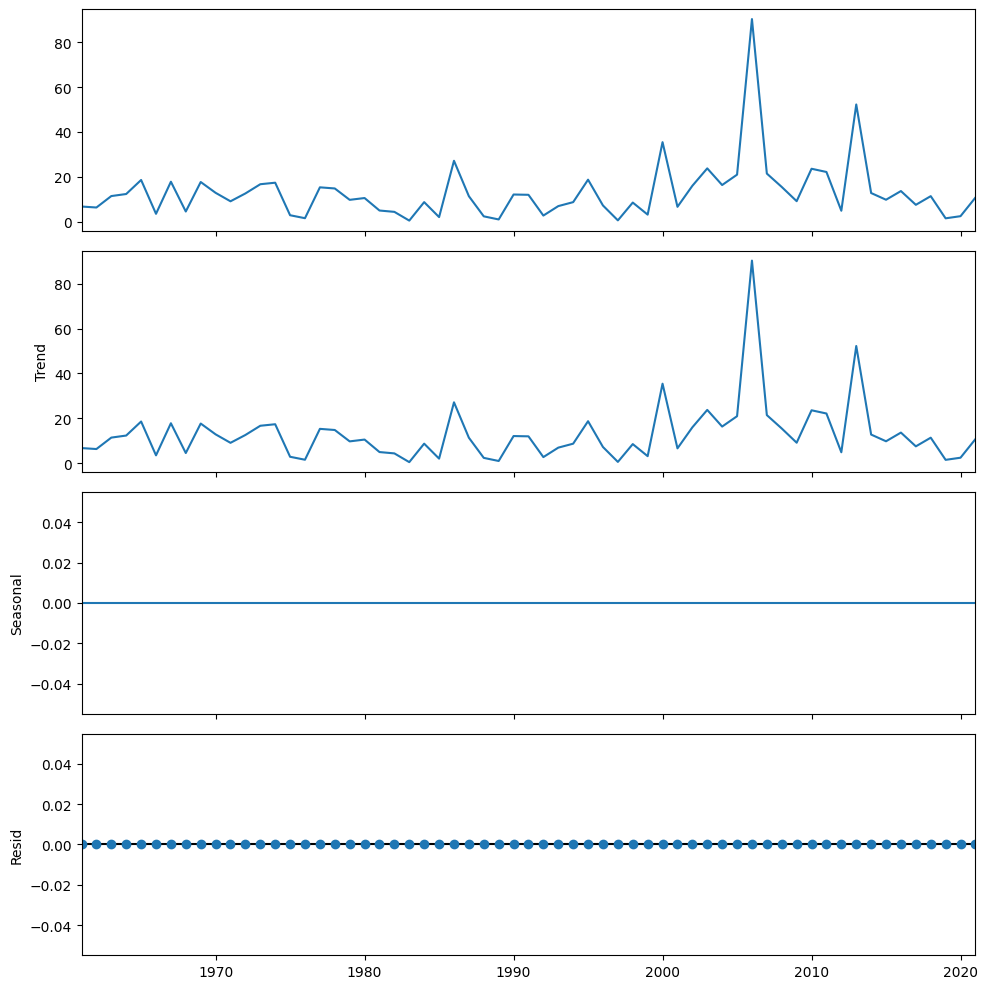

In [47]:
plt.rcParams['figure.figsize'] = 10, 10

# производим декомпозицию временного ряда
decomposition = seasonal.seasonal_decompose(gdp_vol)
decomposition.plot();

In [48]:
# прибираемся немного
del decomposition

gc.collect();

Декомпозиция временного ряда волатильности не отражает сезонности (цикличности), шума не проявляется, тренд отсутствует.

Оценим стационарность ряда (тест Дики-Фуллера):

In [49]:
# проверяем ряд на стационарность
get_adfuller_test(train_df, 2)

ADF Statistic: -6.725311059553779
p-value: 3.4014596148856493e-09
Critical Values: {'1%': -3.5506699942762414, '5%': -2.913766394626147, '10%': -2.5946240473991997}
При пороге '5%' единичных корней нет, ряд СТАЦИОНАРЕН


Построим коррелограммы волатильности:

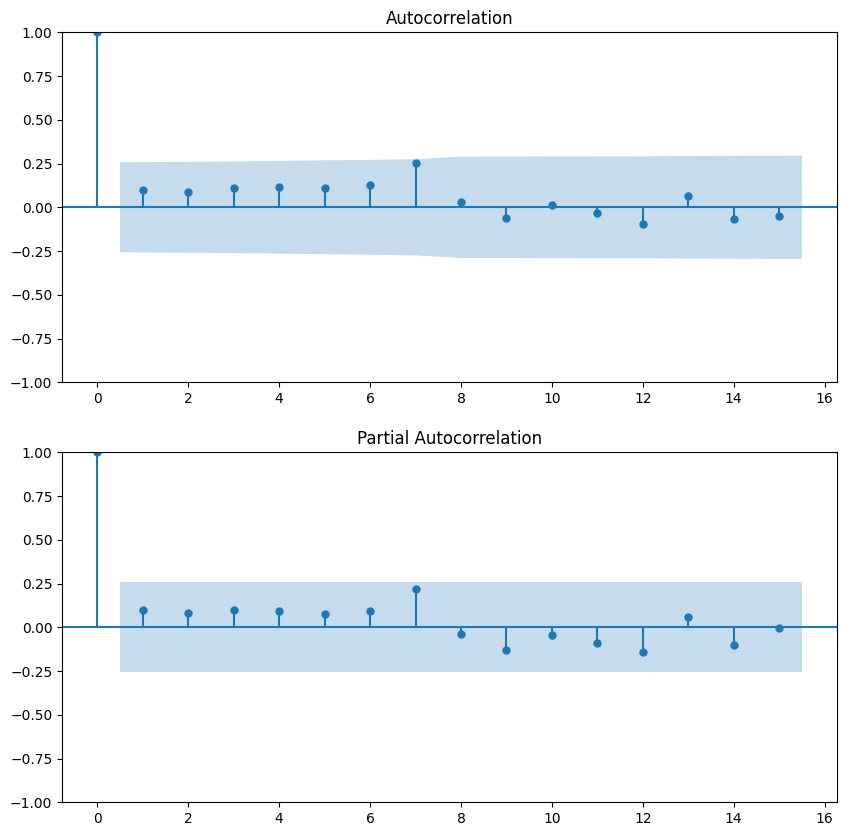

In [50]:
get_correlograms(train_df)

На графиках коррелограмм видно, практически, отсутствующую корреляцию со слабо выделяющимся 7 лагом, что говорит об отсутствии тренда, сезонной и шумовой составляющих, что подтверждает выводы по декомпозиции ранее.

На основании графиков автокорреляции и частичной автокорреляции выбираем параметры для модели:

* $p = 1$,
* $q = 1$.

Построим модель *GARCH(1, 1)*:

In [51]:
# задаём объект класса arch_model, обучаем модель
GARCH_1_1 = univariate.arch_model(gdp_vol, p=1, q=1, vol='GARCH')
GARCH_1_1_res = GARCH_1_1.fit(last_obs=test_df.index[0], update_freq=5)

# выводим результат
GARCH_1_1_res

Iteration:      5,   Func. Count:     27,   Neg. LLF: 251.18811047858395
Iteration:     10,   Func. Count:     57,   Neg. LLF: 4522.5403032525255
Iteration:     15,   Func. Count:     89,   Neg. LLF: 228.00251345130135
Iteration:     20,   Func. Count:    114,   Neg. LLF: 226.5978293605918
Optimization terminated successfully    (Exit mode 0)
            Current function value: 226.59781233106128
            Iterations: 22
            Function evaluations: 123
            Gradient evaluations: 22


                     Constant Mean - GARCH Model Results                      
Dep. Variable:                GDP_vol   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -226.598
Distribution:                  Normal   AIC:                           461.196
Method:            Maximum Likelihood   BIC:                           469.437
                                        No. Observations:                   58
Date:                Mon, Jul 31 2023   Df Residuals:                       57
Time:                        14:49:56   Df Model:                            1
                               Mean Model                               
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
mu            12.3191      2.572      4.790  1.666e-06 [  7.279, 17.36

Вычислим предсказание для модели *GARCH*:

In [52]:
# формируем датасет исходных значений и предсказания модели GARCH
pred_GARCH_1_1 = test_df.copy()
pred_GARCH_1_1['pred_garch'] = GARCH_1_1_res.forecast().residual_variance.loc[
    test_df.index
]

# выводим результат
pred_GARCH_1_1

,GDP_vol,pred_garch
2019-01-01,1.542746,288.546011
2020-01-01,2.495937,292.216032
2021-01-01,10.780603,295.886053


Визуализируем прогноз модели *GARCH* и исходные данные:

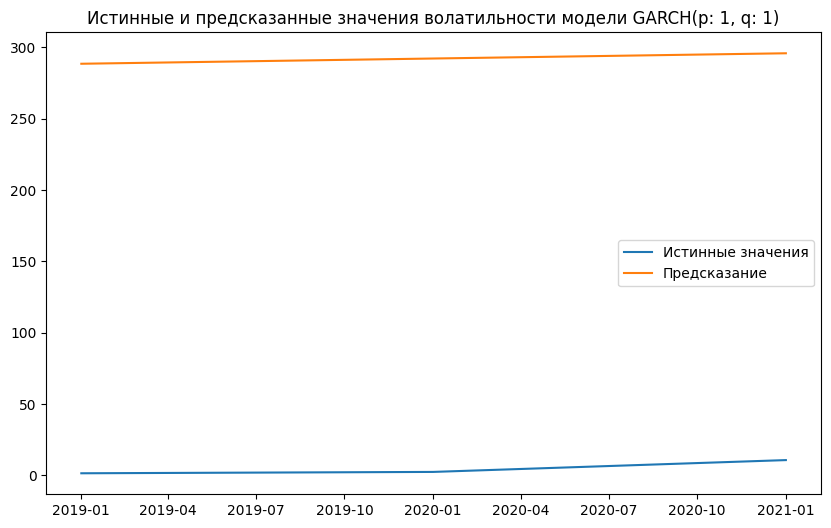

In [53]:
plt.figure(figsize=(10, 6))
plt.plot(pred_GARCH_1_1[pred_GARCH_1_1.columns[0]], label='Истинные значения')
plt.plot(pred_GARCH_1_1[pred_GARCH_1_1.columns[1]], label='Предсказание')
plt.legend()
plt.title(f'Истинные и предсказанные значения волатильности модели {str(GARCH_1_1.volatility)}');

In [54]:
# прибираемся немного
# del GARCH_1_1, GARCH_1_1_res

gc.collect();

### 3.3. Модель LinearRegression (линейная регрессия)

In [55]:
# формируем тренировочные и тестовые выборки
X_train = pd.DataFrame(range(gdp_vol['GDP_vol'].shape[0]))[:train_df.shape[0]]
X_test = pd.DataFrame(range(gdp_vol['GDP_vol'].shape[0]))[train_df.shape[0]:]
y_train = train_df['GDP_vol']
y_test = test_df['GDP_vol']

# задаём объект класса LinearRegression
LR = linear_model.LinearRegression(n_jobs=CPU_ALL)

# задаём объект класса GridSearchCV с кросс-валидацией TimeSeriesSplit, обучаем модель
GSCV_LR = model_selection.GridSearchCV(
    estimator=LR, 
    param_grid={'fit_intercept':[True, False]}, 
    scoring='r2', 
    n_jobs=CPU_ALL, 
    cv=model_selection.TimeSeriesSplit(n_splits=CV_FOLDS, test_size=3), 
    verbose=1
)

# обучаем модель, ищем оптимальный гиперпараметр
GSCV_LR.fit(X_train, y_train)

# вычисляем предсказание GridSearchCV с LinearRegression на тестовой выборке
pred_GSCV_LR_test = GSCV_LR.predict(X_test)
pred_GSCV_LR_test

Fitting 5 folds for each of 2 candidates, totalling 10 fits


GridSearchCV(cv=TimeSeriesSplit(gap=0, max_train_size=None, n_splits=5, test_size=3),
             estimator=LinearRegression(n_jobs=-1), n_jobs=-1,
             param_grid={'fit_intercept': [True, False]}, scoring='r2',
             verbose=1)

array([19.81968247, 20.03529022, 20.25089797])

---

### 3.4. Визуализация предсказания LinearRegression

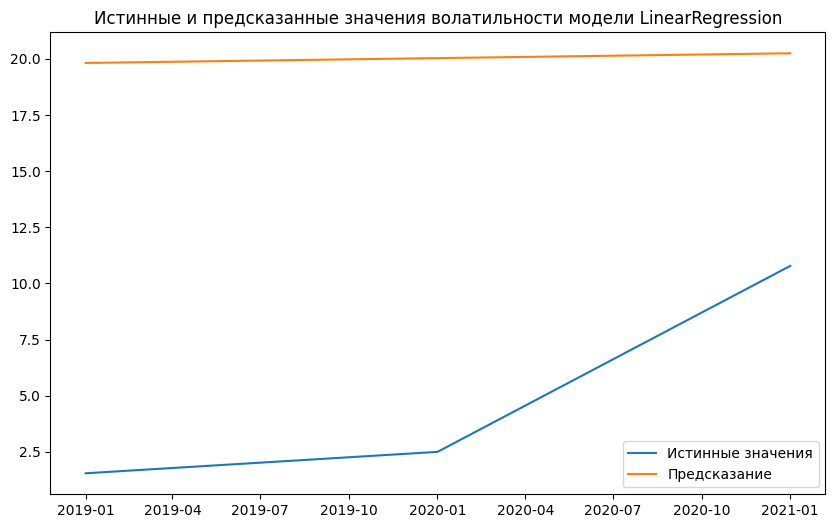

In [56]:
plt.figure(figsize=(10, 6))
plt.plot(y_test, label='Истинные значения')
plt.plot(pd.Series(pred_GSCV_LR_test, index=y_test.index), label='Предсказание')
plt.title(f'Истинные и предсказанные значения волатильности модели {LR.__class__.__name__}')
plt.legend();

---

### 3.5. Метрики, выводы

In [57]:
# метрики модели GARCH
get_metrics(
    pred_GARCH_1_1[pred_GARCH_1_1.columns[0]], 
    pred_GARCH_1_1[pred_GARCH_1_1.columns[1]], 
    train_df
)

MAPE: 10951.89 %
MSE: 8.25312e+06 $^2
RMSE: 2.87283e+02 $
R2: -4794.78
MASE: 25.49


In [58]:
# метрики модели LinearRegression с кросс-валидацией
get_metrics(
    y_test, 
    pred_GSCV_LR_test, 
    X_train
)

MAPE: 658.42 %
MSE: 2.43787e+04 $^2
RMSE: 1.56137e+01 $
R2: -13.17
MASE: 15.10


### **Выводы:**

Метрики для *GARCH(1, 1)* и  *LinearRegression* показывают, что простая модель линейной регрессии с кросс-валидацией показала значительно лучший результат, неидеальный, но всё же гораздо лучше.

В таблице сведены метрики по каждой модели:

<center>

| Метрика | <div style="width:200px">GARCH(1, 1)</div> | <div style="width:200px">LinearRegression()<br>с кросс-валидацией</div> |
| :---: | :---: | :---: |
| $AIC$ | 461.196 | - |
| $MAPE, \%$ | <font color='Tomato'>**10951.89**</font> | <font color='LightSeaGreen'>**658.42**</font> |
| $MSE, \$^2$ | <font color='Tomato'>**8.25312e+06**</font> | <font color='LightSeaGreen'>**2.43787e+04**</font> |
| $RMSE, \$$ | <font color='Tomato'>**2.87283e+02**</font> | <font color='LightSeaGreen'>**1.56137e+01**</font> |
| $R_2$ | <font color='Tomato'>**-4794.78**</font> | <font color='LightSeaGreen'>**-13.17**</font> |
| $MASE$ | <font color='Tomato'>**25.49**</font> | <font color='LightSeaGreen'>**15.10**</font> |

</center>

<br>

---

### 3.6. Заключение

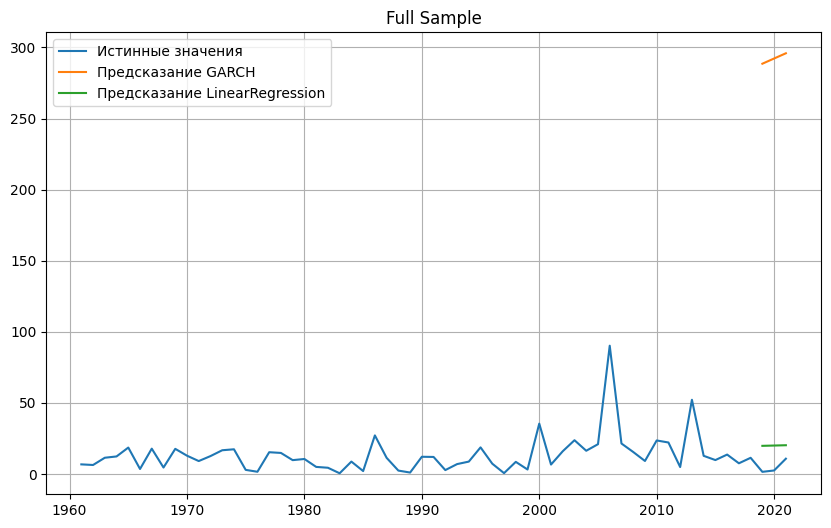

In [59]:
plt.figure(figsize=(10, 6))
plt.plot(gdp_vol, label='Истинные значения')
plt.plot(pred_GARCH_1_1[pred_GARCH_1_1.columns[1]], label='Предсказание GARCH ')
plt.plot(pd.Series(pred_GSCV_LR_test, index=y_test.index), label='Предсказание LinearRegression')
plt.title('Full Sample')
plt.legend()
plt.grid();

### **Выводы:**

* Проанализировав волатильность временного ряда и построив *GARCH* модель получен неудовлетворительный результат, модель совсем не уловила дисперсию, случаи возрастания и убывания дисперсии отсутствовали в обучающей выборке. 

* Ранее выявлено, что ряд являетcя **гомоскедастичным**, т.е. обладает слабой дисперсией на всём своём протяжении, за исключением нескольких значительных выбросов. На имеющихся данных модель *GARCH* показала себя очень слабо, даже, в сравнении линейной регрессии, где метрики оказались значительно лучше, на порядки.

* Модель GARCH показывает значительное расхождение с фактическими значениями волатильности. Из автокорреляционных графиков следует, что автокорреляция волатильности в представленном временном ряде отсутствует, т.е. модель *GARCH* в данном случае неприменима, т.к. предыдущие значения ряда не влияют / слабо влияют на последующие. Возможно, зависимость могла бы проявиться, если бы ряд был бы более объёмный по количеству наблюдений.

* На основании метрик можно сделать вывод, что модель *GARCH* <font color='Tomato'>**не применима под эти данные.**</font>

---